# 220968280 - Anirudh Swaminathan - DSE A2

## Week 5 - Exercise 2 - decision trees and random forest on CGPA.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree

### 1. decision tree

In [2]:
df = pd.read_csv('CGPA.csv')
df.head()

,CGPA,Interactive,Practical_Knowledge,Skills,Job_Offer
0,>=9,Yes,Very Good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes


In [3]:
string_to_int= preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df.head()

,CGPA,Interactive,Practical_Knowledge,Skills,Job_Offer
0,2,1,2,0,1
1,1,0,1,1,1
2,2,0,0,2,0
3,0,0,0,0,0
4,1,1,1,1,1


In [4]:
feature_cols = ['CGPA','Interactive','Practical_Knowledge', 'Skills']
X = df[feature_cols]
y = df['Job_Offer']
y = pd.DataFrame(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.6, 0.8333333333333334, 'Skills <= 1.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = o'),
 Text(0.4, 0.5, 'CGPA <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = o'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = J'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = o'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = J')]

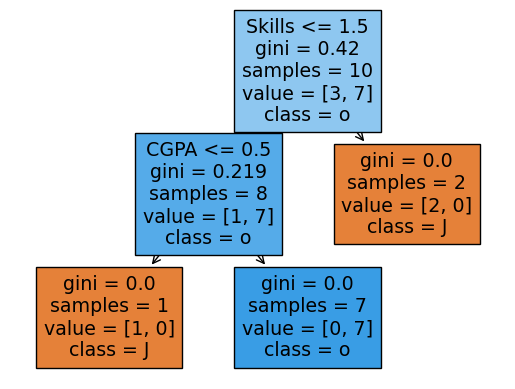

In [7]:
tree.plot_tree(clf,feature_names=feature_cols,class_names='Job_Offer',filled=True)

In [8]:
with open('dt1_cgpa.txt',"w") as f:
    f = tree.export_graphviz(clf, out_file=f, 
                                feature_names=feature_cols,  
                                class_names='Job_Offer',
                                filled=True)


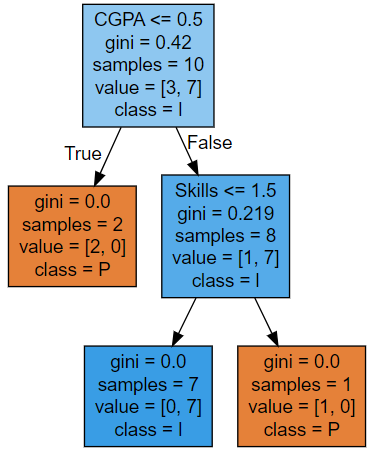

### 2. random forest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

C:\Users\mca\AppData\Local\Temp\ipykernel_8552\71670089.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


RandomForestClassifier(max_depth=2, random_state=0)

[Text(0.4, 0.8333333333333334, 'CGPA <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [5, 5]\nclass = J'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]\nclass = J'),
 Text(0.6, 0.5, 'Interactive <= 0.5\ngini = 0.408\nsamples = 4\nvalue = [2, 5]\nclass = o'),
 Text(0.4, 0.16666666666666666, 'gini = 0.444\nsamples = 2\nvalue = [2, 1]\nclass = J'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 4]\nclass = o')]

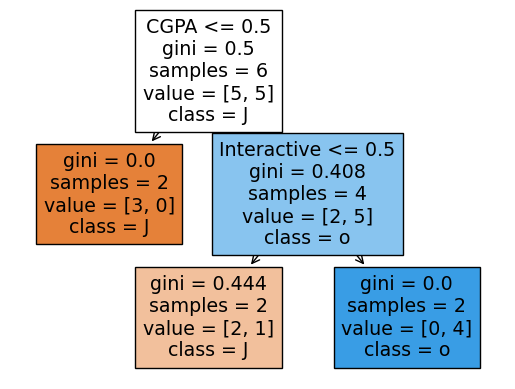

In [11]:
tree.plot_tree(clf.estimators_[0],feature_names=feature_cols,class_names='Job_Offer',filled=True)

In [12]:
with open('dt2_cgpa.txt',"w") as f:
    f = tree.export_graphviz(clf.estimators_[0], out_file=f, 
                                feature_names=feature_cols,  
                                class_names='Job_Offer',
                                filled=True)

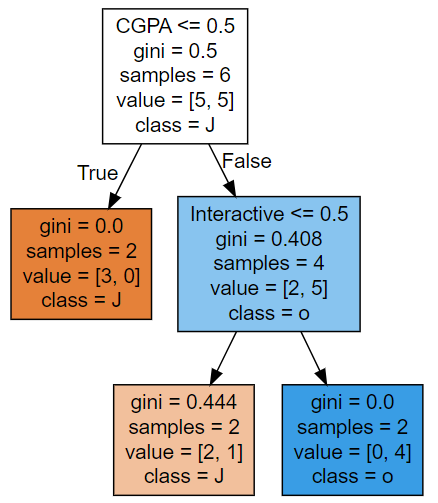